# Imports & Paths

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

output_dir = Path("analysis_outputs")
output_dir.mkdir(parents=True, exist_ok=True)


# Define result directories
root = Path("results")

runs = {
    "DQN": root / "DQN_lr0.0001_gam0.99_20250423_075952" / "metrics" / "reward_history.npy",
    "Dueling DQN": root / "DUELING_lr0.0001_gam0.99_20250423_080258" / "metrics" / "reward_history.npy",
    "PPO": root / "PPO_lr0.00025_gam0.99_20250423_070923" / "metrics" / "reward_history.npy"
}


# Plot Moving Averages

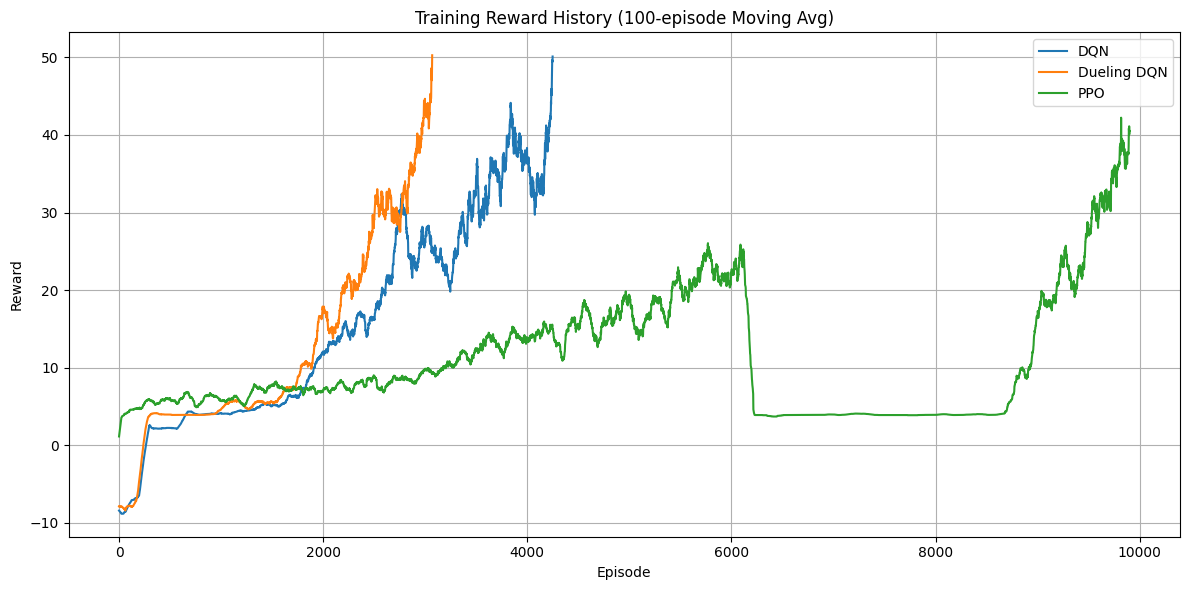

In [12]:
plt.figure(figsize=(12, 6))

for label, path in runs.items():
    if not path.exists():
        print(f"❌ Missing: {path}")
        continue
    rewards = np.load(path)
    moving_avg = np.convolve(rewards, np.ones(100)/100, mode='valid')  # 100-episode moving average
    plt.plot(moving_avg, label=label)

plt.title("Training Reward History (100-episode Moving Avg)")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Best Score Progress

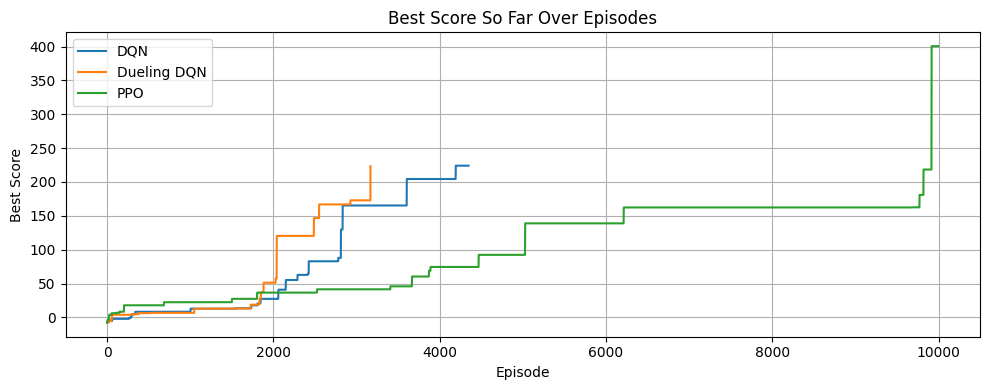

In [13]:
plt.figure(figsize=(10, 4))

for label, path in runs.items():
    if path.exists():
        rewards = np.load(path)
        best_so_far = np.maximum.accumulate(rewards)
        plt.plot(best_so_far, label=label)

plt.title("Best Score So Far Over Episodes")
plt.xlabel("Episode")
plt.ylabel("Best Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Evaluation Score Bar Plots

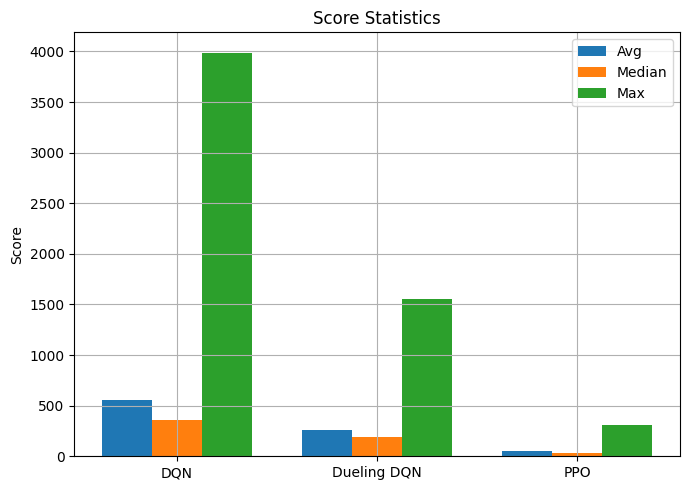

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

labels = ["DQN", "Dueling DQN", "PPO"]
avg_scores = [557.48, 257.13, 51.59]
max_scores = [3989, 1551, 312]
median_scores = [360, 195, 37]

x = np.arange(len(labels))
width = 0.25

# --- Score Metrics ---
plt.figure(figsize=(7, 5))
plt.bar(x - width, avg_scores, width, label='Avg')
plt.bar(x, median_scores, width, label='Median')
plt.bar(x + width, max_scores, width, label='Max')
plt.title("Score Statistics")
plt.ylabel("Score")
plt.xticks(x, labels)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

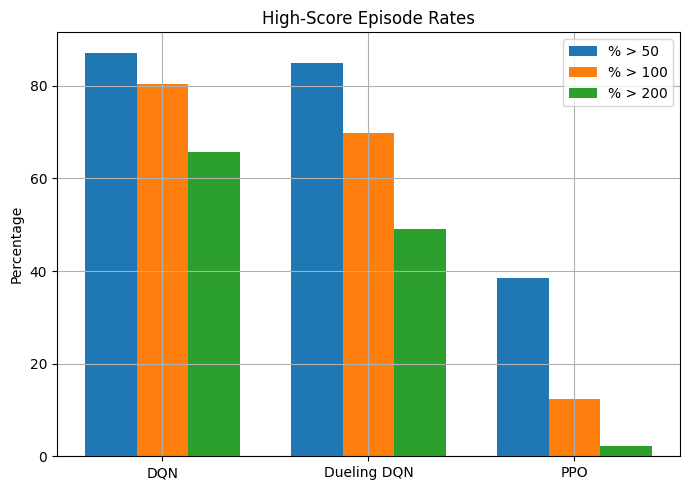

In [19]:
# Data

labels = ["DQN", "Dueling DQN", "PPO"]
gt_50 = [87.2, 85.0, 38.6]
gt_100 = [80.4, 69.8, 12.4]
gt_200 = [65.8, 49.0, 2.2]

x = np.arange(len(labels))
width = 0.25

# --- Threshold Coverage ---
plt.figure(figsize=(7, 5))
plt.bar(x - width, gt_50, width, label='% > 50')
plt.bar(x, gt_100, width, label='% > 100')
plt.bar(x + width, gt_200, width, label='% > 200')
plt.title("High-Score Episode Rates")
plt.ylabel("Percentage")
plt.xticks(x, labels)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

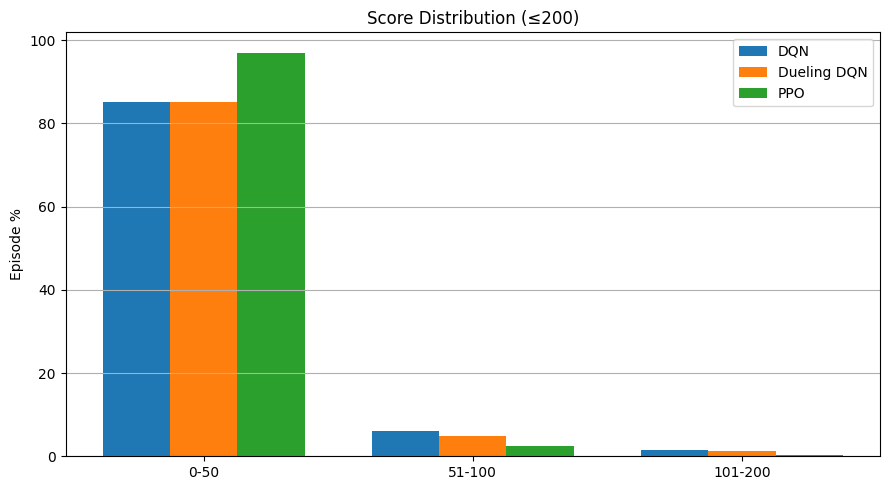

In [30]:
import numpy as np
import matplotlib.pyplot as plt

bins = [0, 50, 100, 200]
labels = ["0-50", "51-100", "101-200"]

def load_and_bin(path):
    scores = np.load(path)
    hist, _ = np.histogram(scores, bins=bins)
    return hist / len(scores) * 100

dqn = load_and_bin("results/DQN_lr0.0001_gam0.99_20250423_075952/metrics/reward_history.npy")
dueling = load_and_bin("results/DUELING_lr0.0001_gam0.99_20250423_080258/metrics/reward_history.npy")
ppo = load_and_bin("results/PPO_lr0.00025_gam0.99_20250423_070923/metrics/reward_history.npy")

x = np.arange(len(labels))
w = 0.25

plt.figure(figsize=(9, 5))
plt.bar(x - w, dqn, w, label="DQN")
plt.bar(x, dueling, w, label="Dueling DQN")
plt.bar(x + w, ppo, w, label="PPO")
plt.xticks(x, labels)
plt.ylabel("Episode %")
plt.title("Score Distribution (≤200)")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("score_distribution_trimmed.png")
plt.show()



# Print & Save All Evaluation Summaries

In [15]:
eval_dir = Path("results")
summary_lines = []

print("\n📊 === All Evaluation Summaries ===\n")

# Recursively search for all eval_*.txt files
for eval_file in eval_dir.rglob("eval_*.txt"):
    print(f"🔹 {eval_file.relative_to(eval_dir.parent)}")
    print("-" * 60)
    content = eval_file.read_text()
    print(content.strip())
    print("\n")
    summary_lines.append(f"# {eval_file.relative_to(eval_dir.parent)}\n{content.strip()}\n\n")

# Optional: Save combined summary to a text file
output_path = eval_dir / "all_eval_summary.txt"
with open(output_path, "w") as f:
    f.writelines(summary_lines)

print(f"✅ All summaries printed. Combined file saved to: {output_path}")



📊 === All Evaluation Summaries ===

🔹 results\DQN_lr0.0001_gam0.99_20250423_075952\eval_dqn_final_model.txt
------------------------------------------------------------
=== Evaluation Summary ===
    Algorithm         : DQN
    Model Path        : /content/flappybird_RL/results/DQN_lr0.0001_gam0.99_20250423_075952/models/final_model.pth
    Episodes Tested   : 500
    Average Score     : 557.48
    Max Score         : 3989
    Median Score      : 360
    Score Std Dev     : 606.85

    # Cumulative Thresholds
    % Episodes > 50   : 87.20%
    % Episodes > 100  : 80.40%
    % Episodes > 200  : 65.80%
    Reached 200+      : Episode 2

    # Score Distribution
    0–50     : 12.80%
    51–100   : 6.80%
    101–200  : 14.60%
    201+     : 65.80%

    Total Eval Time   : 670.16 sec


🔹 results\DUELING_lr0.0001_gam0.99_20250423_080258\eval_dueling_final_model.txt
------------------------------------------------------------
=== Evaluation Summary ===
    Algorithm         : DUELING
    Mo